In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2022-10-19 12:31:36--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 2404:6800:4009:821::200e, 142.250.182.206
Connecting to drive.google.com (drive.google.com)|2404:6800:4009:821::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/90me3also4re67504amn9mhrp401diqs/1666162875000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=c1cb2096-f8d1-40ed-a540-5c173d6f99f1 [following]
--2022-10-19 12:31:36--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/90me3also4re67504amn9mhrp401diqs/1666162875000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=c1cb2096-f8d1-40ed-a540-5c173d6f99f1
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 2404:6800:4009:830::2001, 142.251.42.33
Connecting to doc-0

In [3]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size:]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)



In [4]:
# previously use
#voacab_size = 1000
#embedding_dim = 16
#max_length = 100
#trunc_type = 'post'
#padding_type = 'post'

In [5]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type ='post'
padding_type ='post'
oov_tok = '<OOV>'

In [6]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 60
history = model.fit(training_padded,training_labels_final, epochs=num_epochs, validation_data=(testing_padded,testing_labels_final))

Epoch 1/60
50/50 [==============================] - 1s 6ms/step - loss: 0.6923 - accuracy: 0.5223 - val_loss: 0.6972 - val_accuracy: 0.4110
Epoch 2/60
50/50 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5223 - val_loss: 0.6977 - val_accuracy: 0.4110
Epoch 3/60
50/50 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5499 - val_loss: 0.6928 - val_accuracy: 0.4737
Epoch 4/60
50/50 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6384 - val_loss: 0.6856 - val_accuracy: 0.5113
Epoch 5/60
50/50 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6648 - val_loss: 0.6870 - val_accuracy: 0.4962
Epoch 6/60
50/50 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6999 - val_loss: 0.6676 - val_accuracy: 0.5589
Epoch 7/60
50/50 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7200 - val_loss: 0.6397 - val_accuracy: 0.6767
Epoch 8/60
50/50 [==

50/50 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9404 - val_loss: 0.6963 - val_accuracy: 0.7243
Epoch 60/60
50/50 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9416 - val_loss: 0.6659 - val_accuracy: 0.7368


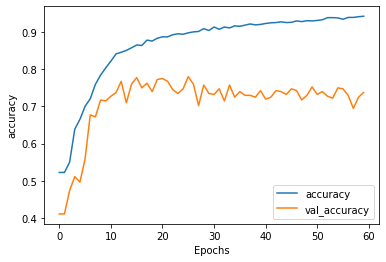

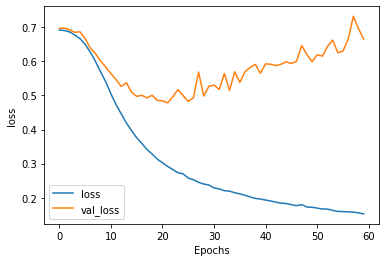

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Get files for visualizing the network

In [10]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(500, 16)


In [11]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [12]:
# Download the files
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

## Predicting Sentiment in New Reviews

In [13]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(classes[x])
    print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.9920689]


I hate spaghetti
[0.01339141]


Everything was cold
[0.6601336]


Everything was hot exactly as I wanted
[0.34162658]


Everything was green
[0.6601336]


the host seated us immediately
[0.8336044]


they gave us free chocolate cake
[0.9928486]


not sure about the wilted flowers on the table
[0.0074462]


only works when I stand on tippy toes
[0.9912633]


does not work when I stand on my head
[0.0038234]


